In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 새 섹션

In [ ]:
!pip install rembg # for library
!pip install rembg[cli] # for library + cli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 12.5 MB/s eta 

In [ ]:
!pip install rembg[gpu] # for library
!pip install rembg[gpu,cli] # for library + cli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 MB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install Pillow

# 실루엣화 및 rembg 테스트

In [ ]:
from rembg import remove
from PIL import Image
input_path = '/content/drive/MyDrive/whosthatpok/PokemonData/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg'

input = Image.open(input_path) # load image
output = remove(input) # remove background
output.save('/content/drive/MyDrive/whosthatpok/rembg.PNG') # save image

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 79.9GB/s]


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.


In [ ]:
print(output.size)

(229, 220)


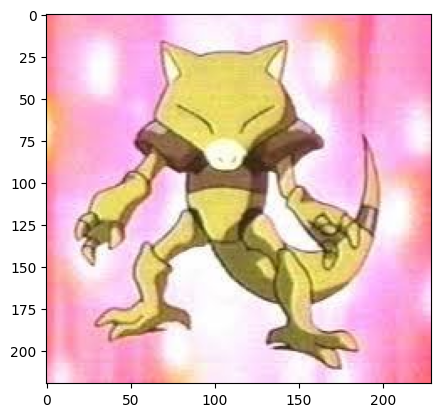

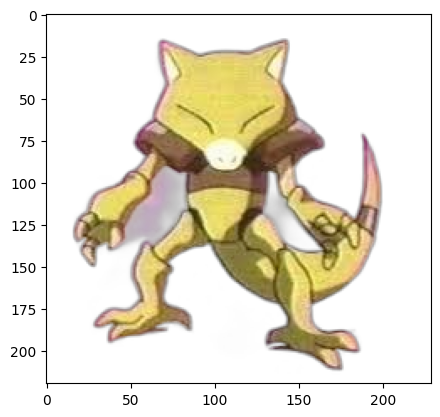

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(input)
plt.show()
plt.imshow(output)
plt.show()

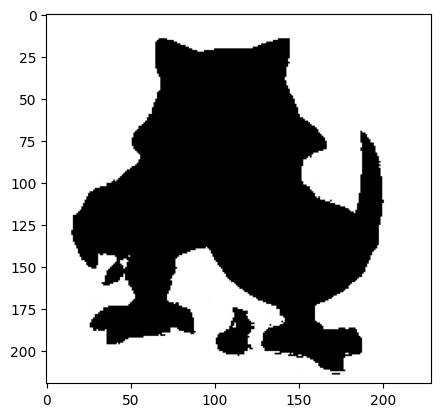

In [ ]:
def png2sil(input_image_path, output_image_path):
    # 이미지 열기
    img = Image.open(input_image_path)

    # 이미지의 각 픽셀을 순회하고, 투명하지 않은 픽셀을 검정색(0, 0, 0, 255)으로 설정
    for x in range(img.width):
        for y in range(img.height):
            r, g, b, a = img.getpixel((x, y))
            if r+g+b > 5:  # 투명하지 않은 경우
                img.putpixel((x, y), (0, 0, 0, 255))
    img.save(output_image_path)
input_path = '/content/drive/MyDrive/whosthatpok/rembg.PNG'
output_path = '/content/drive/MyDrive/whosthatpok/sil.PNG'
png2sil(input_path, output_path)

plt.imshow(Image.open(output_path))
plt.show()

# 피카츄 데이터셋에 적용

In [ ]:
import os
def get_all_files_in_folder(folder_path):
    file_list = []
    # 폴더 내의 모든 파일에 대해 반복
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # 파일인 경우에만 리스트에 추가
        if os.path.isfile(file_path):
            file_list.append(file_path)
    return file_list

def convert_to_png(input_folder, output_folder):
    # 출력 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 입력 폴더의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(input_folder):
        # 이미지 파일 경로
        input_path = os.path.join(input_folder, filename)

        # 파일 확장자가 이미지인 경우에만 처리
        if os.path.isfile(input_path) and any(input_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.gif']):
            # 이미지 열기
            img = Image.open(input_path)

            # 출력 폴더에 PNG 형식으로 저장
            output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + ".png")
            img.convert("RGBA").save(output_path, format="PNG")


In [ ]:
def resize_images(input_folder, output_folder, target_size):

    # 출력 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 입력 폴더의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(input_folder):
        # 파일 확장자가 ".png"인 경우에만 처리
        if filename.endswith(".png"):
            # 이미지 파일 경로
            input_path = os.path.join(input_folder, filename)
            # 이미지 열기
            img = Image.open(input_path)
            # 이미지 크기 조정
            resized_img = img.resize(target_size, Image.ANTIALIAS)
            # 출력 폴더에 크기가 조정된 이미지 저장
            output_path = os.path.join(output_folder, filename)
            resized_img.save(output_path)

In [ ]:
def rembg_folder(input_folder, output_folder):

    # 출력 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 입력 폴더의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(input_folder):
        # 파일 확장자가 ".png"인 경우에만 처리
        if filename.endswith(".png"):
            # 이미지 파일 경로
            input_path = os.path.join(input_folder, filename)
            # 이미지 열기
            img = Image.open(input_path)
            # 이미지 크기 조정
            rembg_img = remove(img, alpha_matting=True, alpha_matting_foreground_threshold=270,alpha_matting_background_threshold=20, alpha_matting_erode_size=11)
            # 출력 폴더에 크기가 조정된 이미지 저장
            output_path = os.path.join(output_folder, filename)
            rembg_img.save(output_path)

In [ ]:
input_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_fin'
output_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_png'
convert_to_png(input_folder_path, output_folder_path)


input_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_png'
output_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_128'
resize_images(input_folder_path, output_folder_path, (128,128))

<ipython-input-11-ab7e4d400070>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


In [ ]:
def to_sil(input_folder, output_folder):
    # 출력 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 입력 폴더의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(input_folder):
        # 파일 확장자가 ".png"인 경우에만 처리
        if filename.endswith(".png"):
            # 이미지 파일 경로
            input_path = os.path.join(input_folder, filename)
            # 이미지 열기
            img = Image.open(input_path)

            # 이미지의 각 픽셀을 순회하고, 투명하지 않은 픽셀을 검정색(0, 0, 0, 255)으로 설정
            for x in range(img.width):
              for y in range(img.height):
                r, g, b, a = img.getpixel((x, y))
                if r+g+b < 750 and r+g+b > 15:  # 투명하지 않은 경우
                  img.putpixel((x, y), (0, 0, 0, 255))
            output_path = os.path.join(output_folder, filename)
            img.save(output_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_png'
output_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_sil'
to_sil(input_folder_path, output_folder_path)

input_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_sil'
output_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_sil_128'
resize_images(input_folder_path, output_folder_path, (128,128))



<ipython-input-11-ab7e4d400070>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


In [ ]:
input_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_need_change'
output_folder_path = '/content/drive/MyDrive/whosthatpok/pikachu_rembg'
rembg_folder(input_folder_path, output_folder_path)

EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecut

/usr/local/lib/python3.10/dist-packages/rembg/bg.py:77: UserWarning: Expected RGB image of shape (?, ?, 3), but image.shape is (964, 1884).
  alpha = estimate_alpha_cf(img_normalized, trimap_normalized)


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.


/usr/local/lib/python3.10/dist-packages/rembg/bg.py:77: UserWarning: Expected RGB image of shape (?, ?, 3), but image.shape is (464, 825).
  alpha = estimate_alpha_cf(img_normalized, trimap_normalized)


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecut

/usr/local/lib/python3.10/dist-packages/rembg/bg.py:77: UserWarning: Expected RGB image of shape (?, ?, 3), but image.shape is (1300, 1212).
  alpha = estimate_alpha_cf(img_normalized, trimap_normalized)


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecut

/usr/local/lib/python3.10/dist-packages/rembg/bg.py:77: UserWarning: Expected RGB image of shape (?, ?, 3), but image.shape is (350, 300).
  alpha = estimate_alpha_cf(img_normalized, trimap_normalized)


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecut

/usr/local/lib/python3.10/dist-packages/rembg/bg.py:77: UserWarning: Expected RGB image of shape (?, ?, 3), but image.shape is (400, 750).
  alpha = estimate_alpha_cf(img_normalized, trimap_normalized)


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecut

/usr/local/lib/python3.10/dist-packages/rembg/bg.py:77: UserWarning: Expected RGB image of shape (?, ?, 3), but image.shape is (480, 412).
  alpha = estimate_alpha_cf(img_normalized, trimap_normalized)


EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libnvinfer.so.8: cannot open shared object file: No such file or directory
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecut

In [ ]:
img = Image.open('/content/drive/MyDrive/whosthatpok/pikachu_png/0328.png')
print(img.getpixel((100,10)))

(185, 208, 240, 0)


In [ ]:
from PIL import ImageFilter


image = Image.open('/content/drive/MyDrive/whosthatpok/pikachu_png/0328.png')
image = image.filter(ImageFilter.ModeFilter(size=13))
image.save('output_image.png')